In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

In [4]:
import pandas as pd
mi1=pd.read_csv("C:/Users/shanm/Downloads/medical_insurance (2).csv")

In [4]:
mi1.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


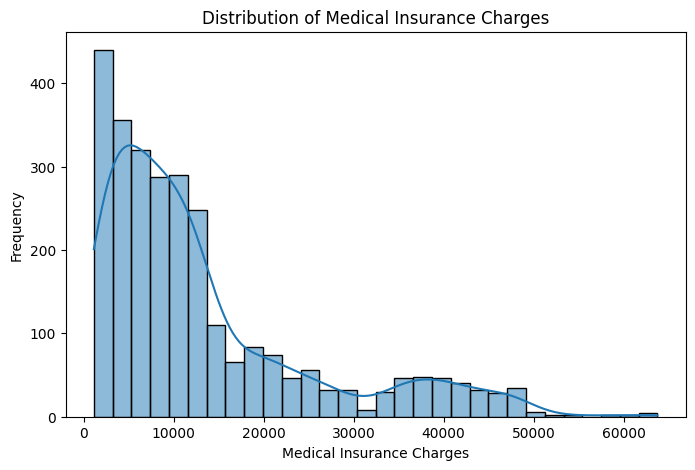

In [5]:
plt.figure(figsize=(8, 5))
sns.histplot(mi1['charges'], bins=30, kde=True)
plt.xlabel("Medical Insurance Charges")
plt.ylabel("Frequency")
plt.title("Distribution of Medical Insurance Charges")
plt.show()



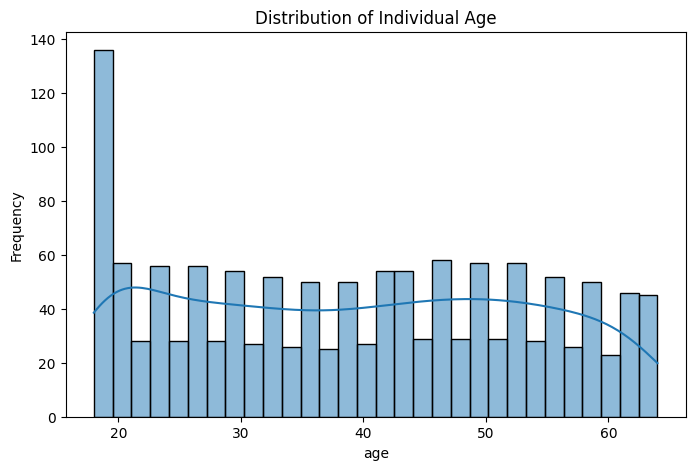

In [115]:
plt.figure(figsize=(8, 5))
sns.histplot(mi1['age'], bins=30, kde=True)
plt.xlabel("age")
plt.ylabel("Frequency")
plt.title("Distribution of Individual Age")
plt.show()


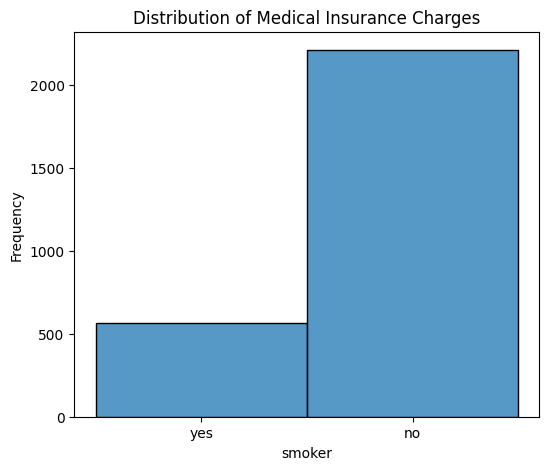

In [8]:
plt.figure(figsize=(6, 5))
sns.histplot(mi1['smoker'], bins=30)
plt.xlabel("smoker")
plt.ylabel("Frequency")
plt.title("Distribution of Medical Insurance Charges")
plt.show()

BMI range
Underweight: Below 18.5.
Normal weight: 18.5 - 24.9.
Overweight: 25.0 - 29.9.
Obese: 30.0 or greater. 

In [9]:
average_bmi = mi1['bmi'].mean()
print(f"Average BMI: {average_bmi}")



Average BMI: 30.70134920634921


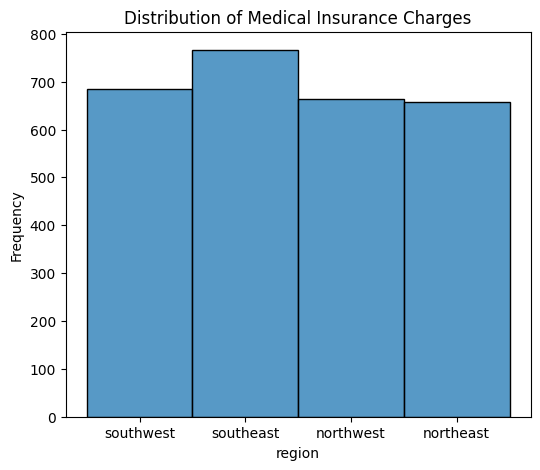

In [10]:
plt.figure(figsize=(6, 5))
sns.histplot(mi1['region'], bins=30)
plt.xlabel("region")
plt.ylabel("Frequency")
plt.title("Distribution of Medical Insurance Charges")
plt.show()

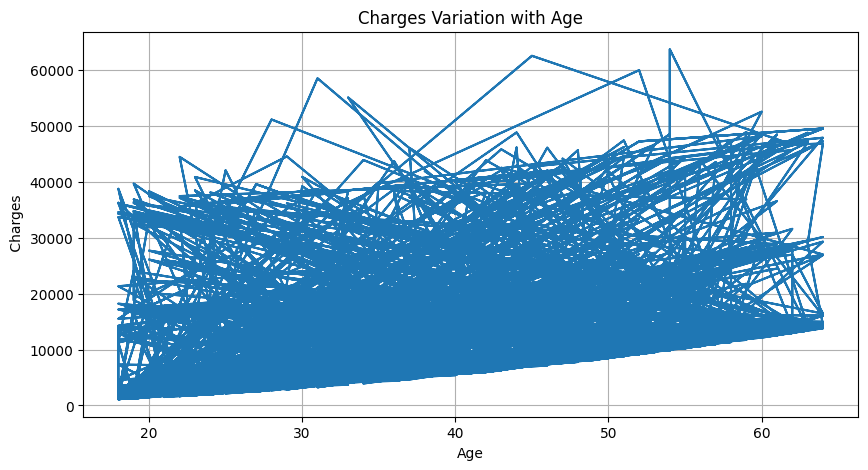

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(mi1['age'], mi1['charges'], linestyle='-')
plt.xlabel('Age')
plt.ylabel(' Charges')
plt.title('Charges Variation with Age')
plt.grid(True)
plt.show()



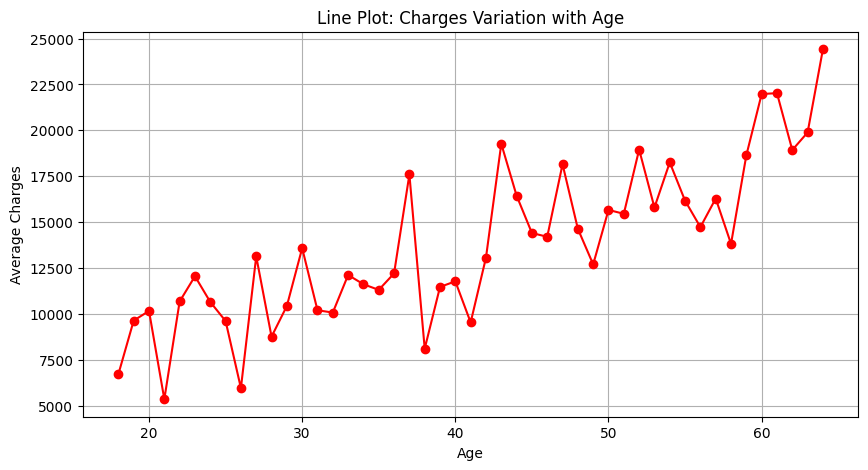

In [10]:
import pandas as pd

age_charges = mi1.groupby('age')['charges'].mean().reset_index()

plt.figure(figsize=(10, 5))
plt.plot(age_charges['age'], age_charges['charges'], marker='o', linestyle='-', color='red')
plt.xlabel('Age')
plt.ylabel('Average Charges')
plt.title('Line Plot: Charges Variation with Age')
plt.grid(True)
plt.show()


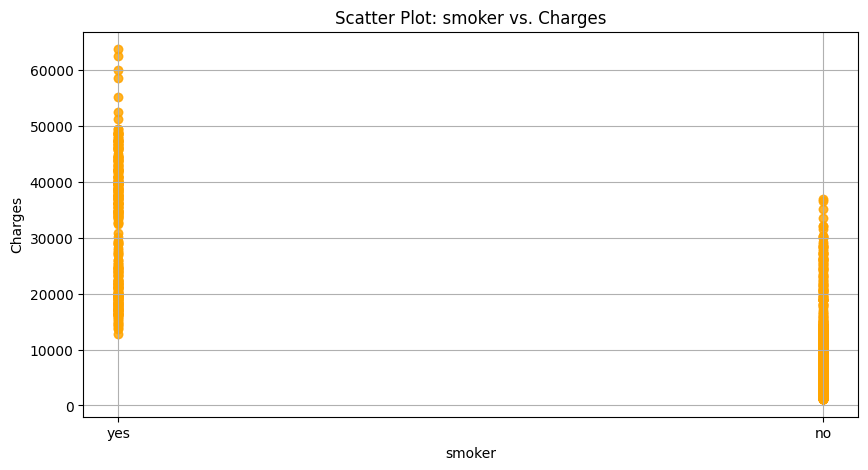

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.scatter(mi1['smoker'], mi1['charges'], alpha=0.6, c='orange')
plt.xlabel('smoker')
plt.ylabel('Charges')
plt.title('Scatter Plot: smoker vs. Charges')
plt.grid(True)
plt.show()

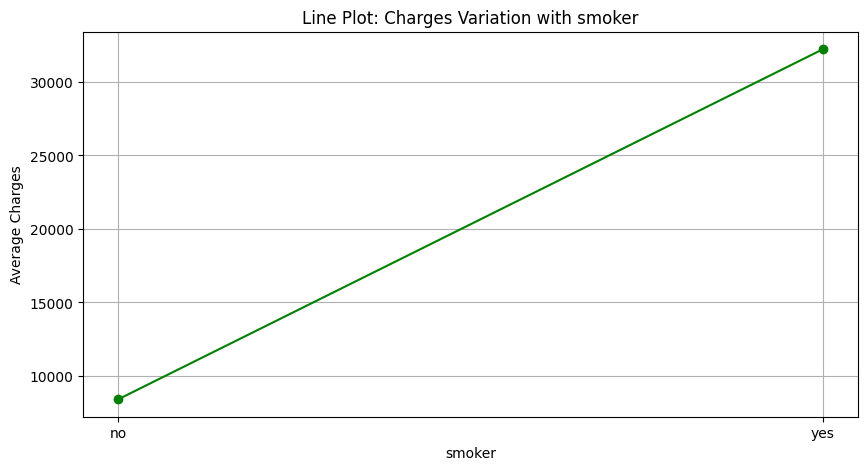

In [12]:
smoker_charges = mi1.groupby('smoker')['charges'].mean().reset_index()

plt.figure(figsize=(10, 5))
plt.plot(smoker_charges['smoker'], smoker_charges['charges'], marker='o', linestyle='-', color='green')
plt.xlabel('smoker')
plt.ylabel('Average Charges')
plt.title('Line Plot: Charges Variation with smoker')
plt.grid(True)
plt.show()

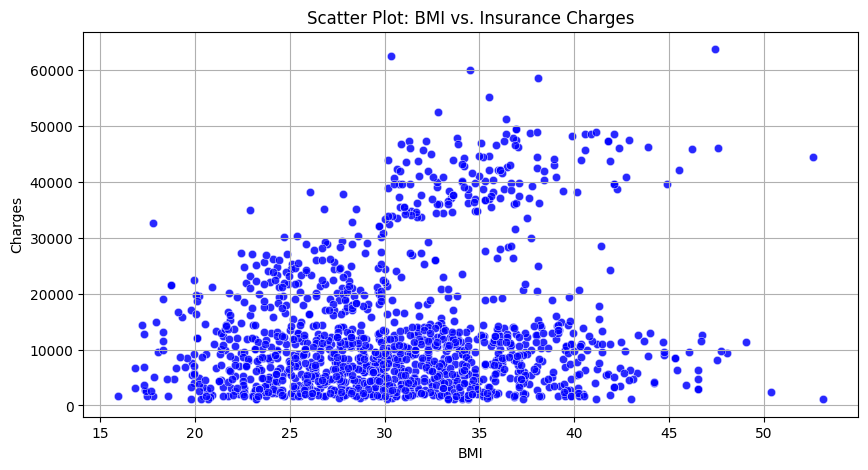

In [13]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=mi1['bmi'], y=mi1['charges'], alpha=0.6, color='blue')

plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('Scatter Plot: BMI vs. Insurance Charges')
plt.grid(True)
plt.show()





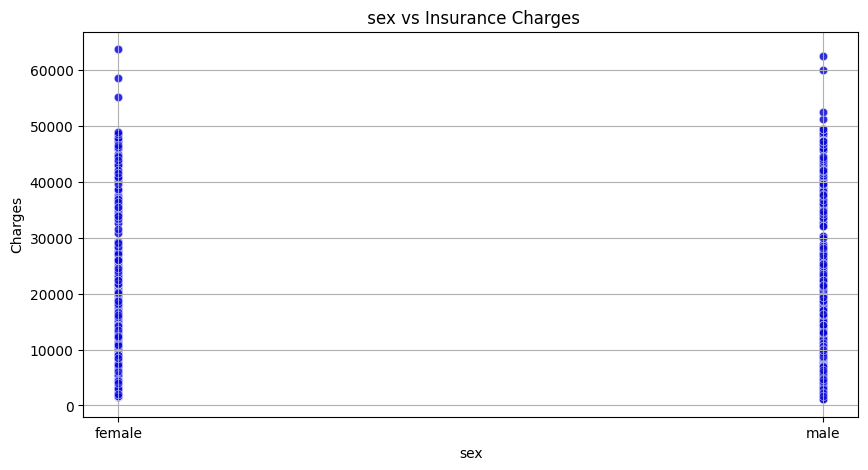

In [14]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=mi1['sex'], y=mi1['charges'], alpha=0.6, color='blue')

plt.xlabel('sex')
plt.ylabel('Charges')
plt.title(' sex vs Insurance Charges')
plt.grid(True)
plt.show()

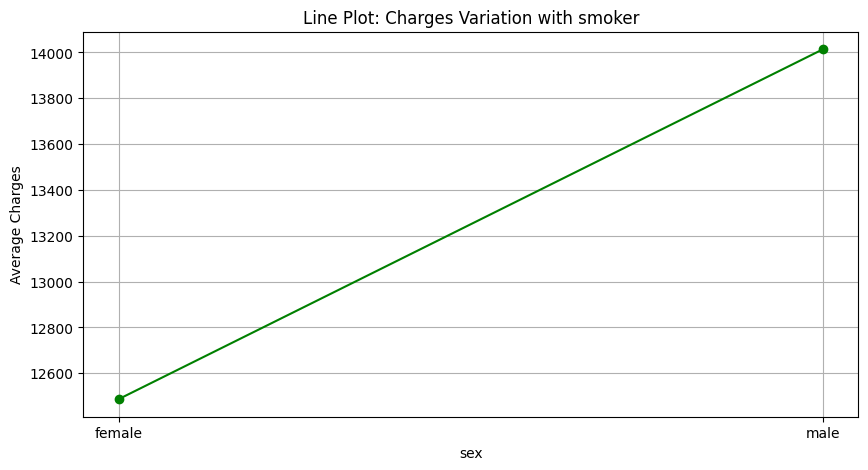

In [15]:
sexwise_charges = mi1.groupby('sex')['charges'].mean().reset_index()

plt.figure(figsize=(10, 5))
plt.plot(sexwise_charges['sex'], sexwise_charges['charges'], marker='o', linestyle='-', color='green')
plt.xlabel('sex')
plt.ylabel('Average Charges')
plt.title('Line Plot: Charges Variation with smoker')
plt.grid(True)
plt.show()

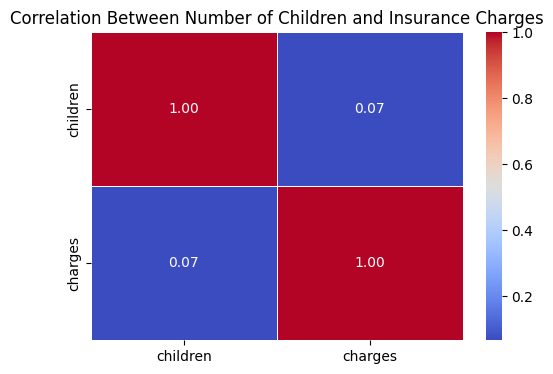

In [16]:
correlation_data = mi1[['children', 'charges']].corr()

# Create a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_data, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title('Correlation Between Number of Children and Insurance Charges')
plt.show()



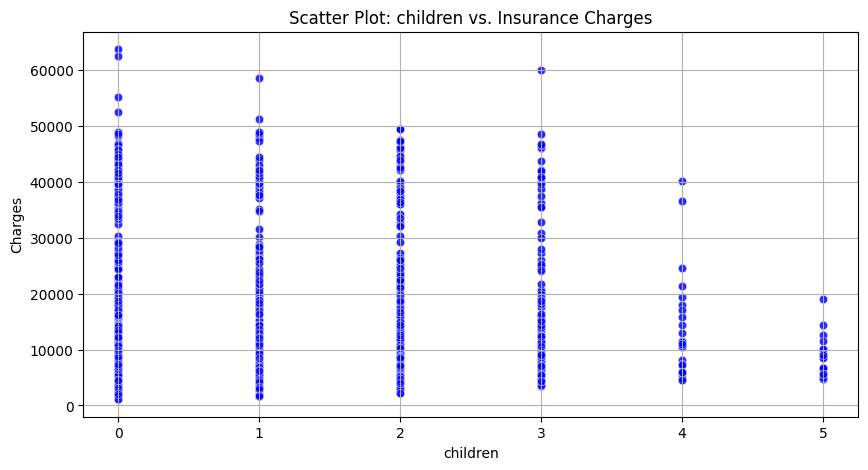

In [17]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=mi1['children'], y=mi1['charges'], alpha=0.6, color='blue')

plt.xlabel('children')
plt.ylabel('Charges')
plt.title('Scatter Plot: children vs. Insurance Charges')
plt.grid(True)
plt.show()

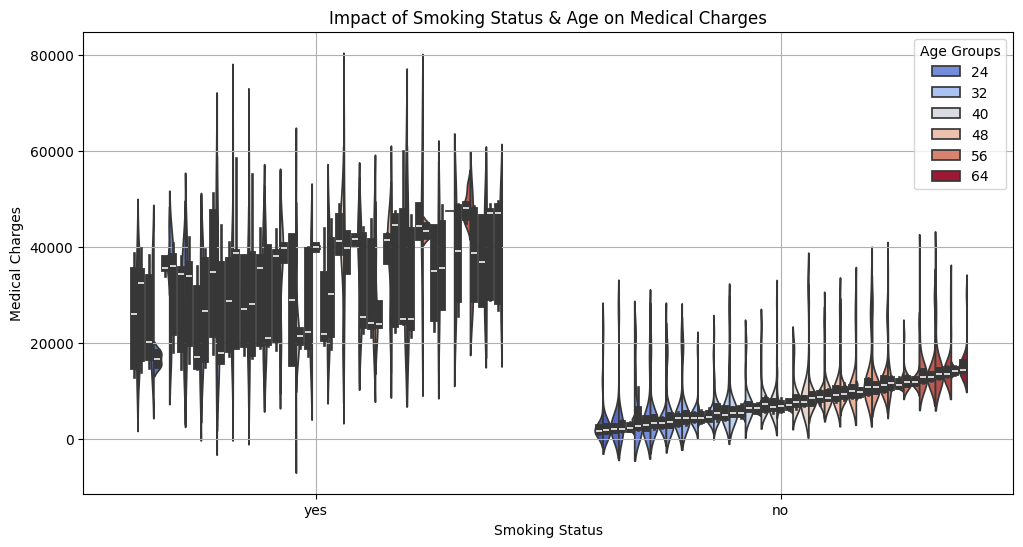

In [18]:
plt.figure(figsize=(12, 6))
sns.violinplot(x=mi1['smoker'], y=mi1['charges'], hue=mi1['age'], split=True, palette='coolwarm')

plt.xlabel('Smoking Status')
plt.ylabel('Medical Charges')
plt.title('Impact of Smoking Status & Age on Medical Charges')
plt.legend(title='Age Groups')
plt.grid(True)
plt.show()


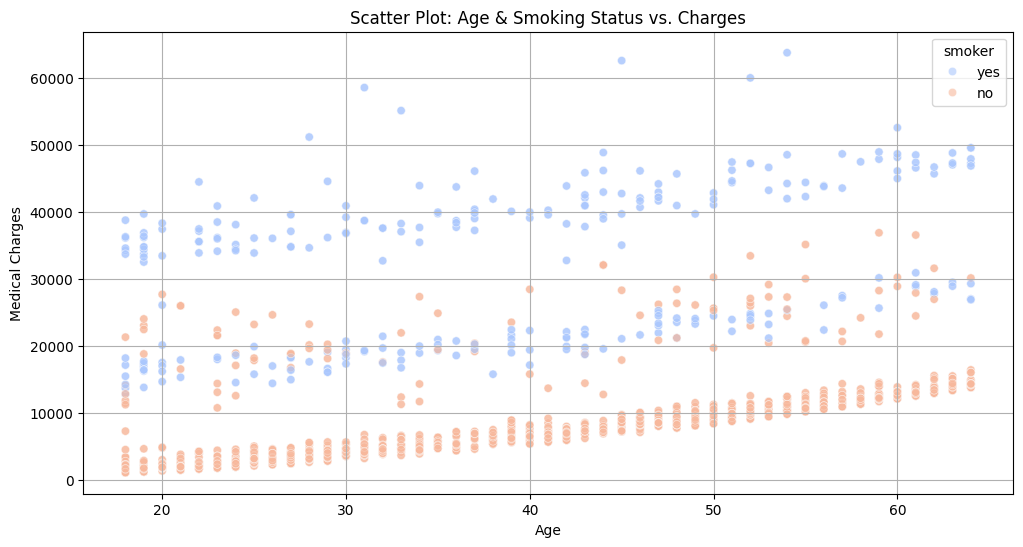

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.scatterplot(x=mi1['age'], y=mi1['charges'], hue=mi1['smoker'], alpha=0.6, palette='coolwarm')

plt.xlabel('Age')
plt.ylabel('Medical Charges')
plt.title('Scatter Plot: Age & Smoking Status vs. Charges')
plt.grid(True)
plt.show()


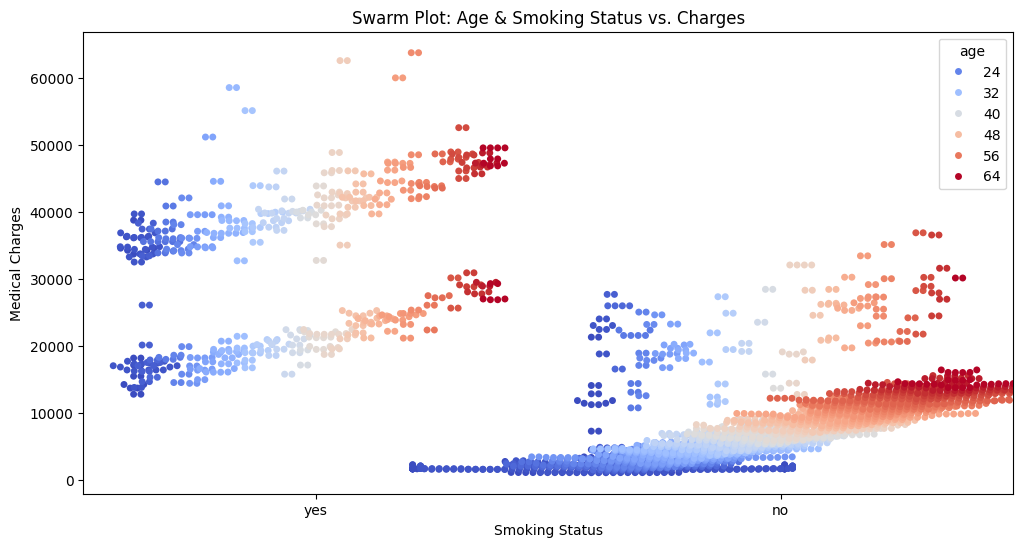

In [ ]:
plt.figure(figsize=(12, 6))
sns.swarmplot(x=mi1['smoker'], y=mi1['charges'], hue=mi1['age'], palette='coolwarm', dodge=True)

plt.xlabel('Smoking Status')
plt.ylabel('Medical Charges')
plt.title('Age & Smoking Status vs. Charges')
plt.show()



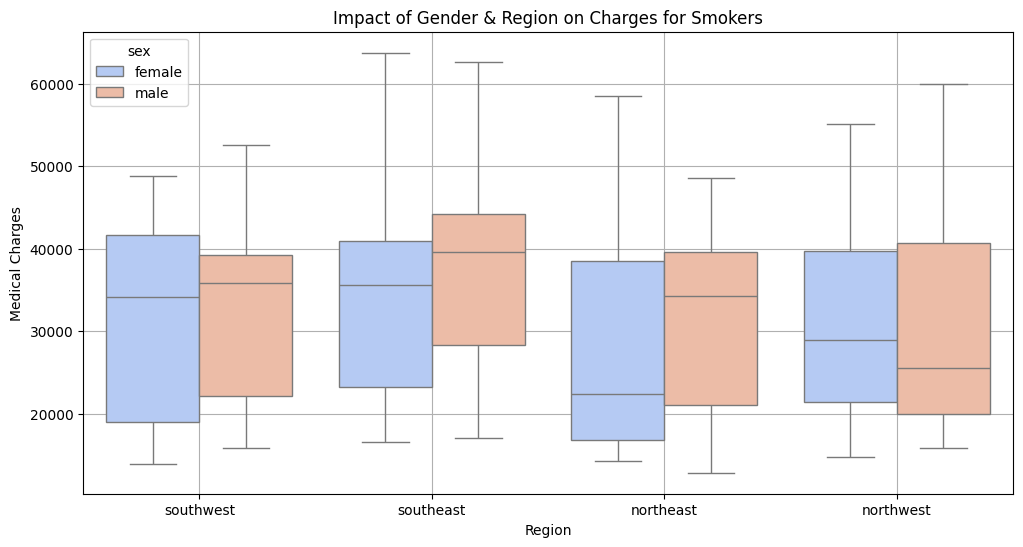

In [20]:
smokers_mi1 = mi1[mi1['smoker'] == 'yes']

# Create a box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x=smokers_mi1['region'], y=smokers_mi1['charges'], hue=smokers_mi1['sex'], palette='coolwarm')

plt.xlabel('Region')
plt.ylabel('Medical Charges')
plt.title('Impact of Gender & Region on Charges for Smokers')
plt.legend(title='sex')
plt.grid(True)
plt.show()



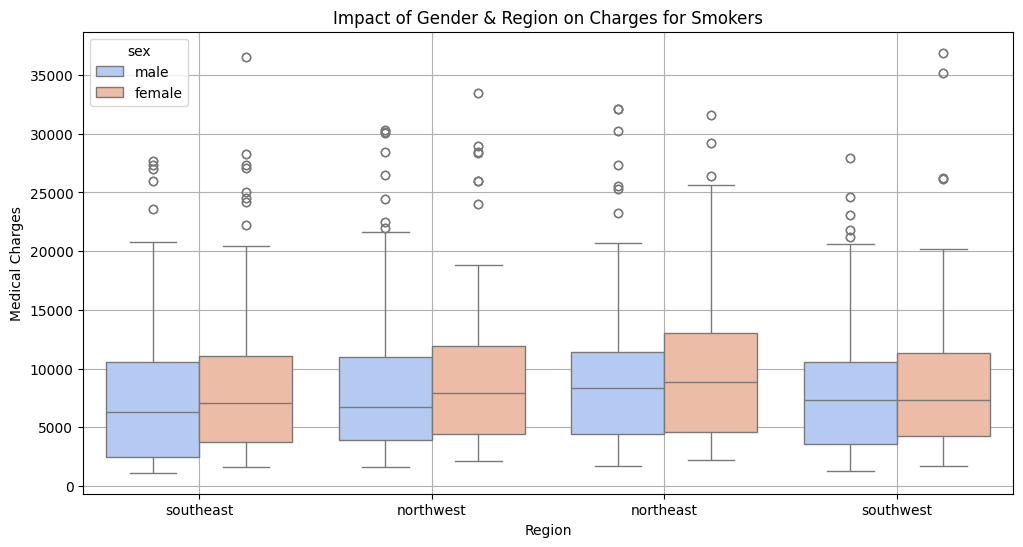

In [21]:
smokers_mi1 = mi1[mi1['smoker'] == 'no']

# Create a box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x=smokers_mi1['region'], y=smokers_mi1['charges'], hue=smokers_mi1['sex'], palette='coolwarm')

plt.xlabel('Region')
plt.ylabel('Medical Charges')
plt.title('Impact of Gender & Region on Charges for Smokers')
plt.legend(title='sex')
plt.grid(True)
plt.show()

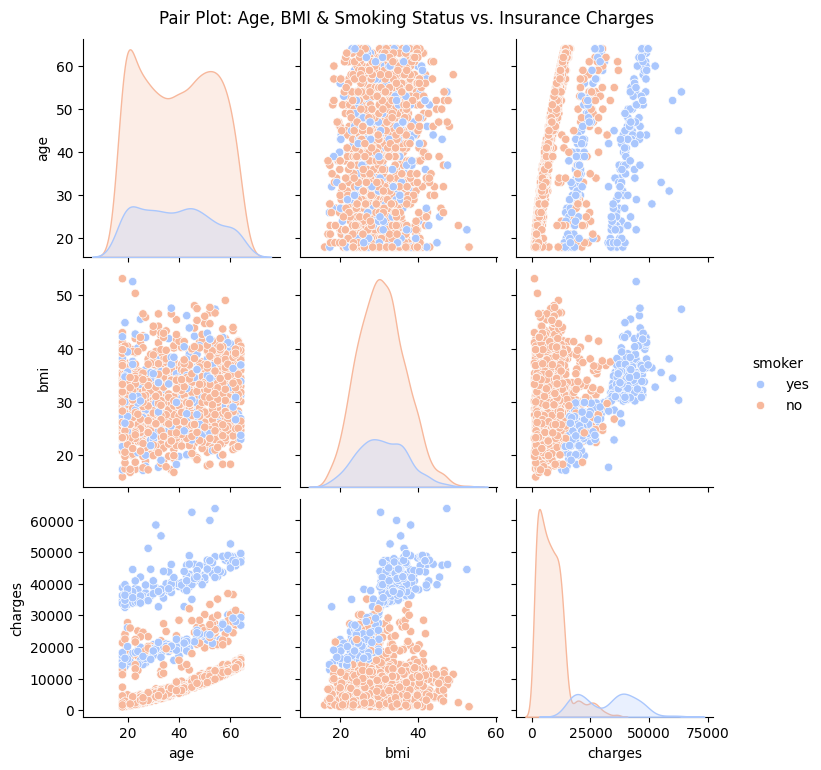

In [22]:
sns.pairplot(mi1, hue='smoker', vars=['age', 'bmi', 'charges'], palette='coolwarm')

plt.suptitle('Pair Plot: Age, BMI & Smoking Status vs. Insurance Charges', y=1.02)
plt.show()



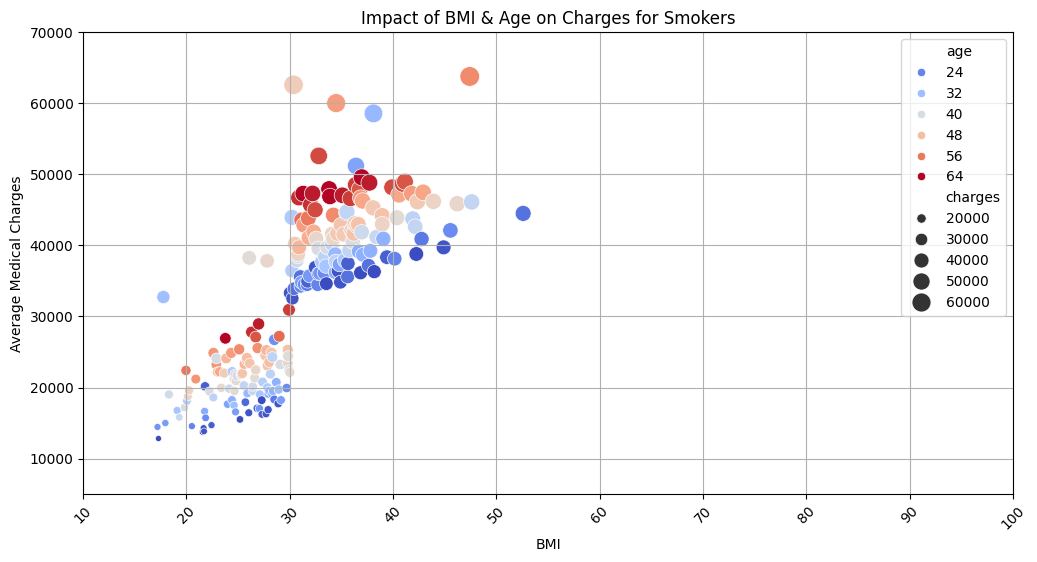

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter smokers only
smokers_mi1 = mi1[mi1['smoker'] == 'yes']

# Correct groupby syntax (charges & age should be a list)
smokers_grouped = smokers_mi1.groupby(['bmi'])[['charges', 'age']].mean().reset_index()

# Scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x=smokers_grouped['bmi'], y=smokers_grouped['charges'], hue=smokers_grouped['age'], palette='coolwarm', size=smokers_grouped['charges'], sizes=(20, 200))

plt.xlabel('BMI')
plt.ylabel('Average Medical Charges')
plt.title('Impact of BMI & Age on Charges for Smokers')

# Set x-axis and y-axis range
plt.xlim(10, 100)  
plt.ylim(5000, 70000)  

plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.grid(True)
plt.show()

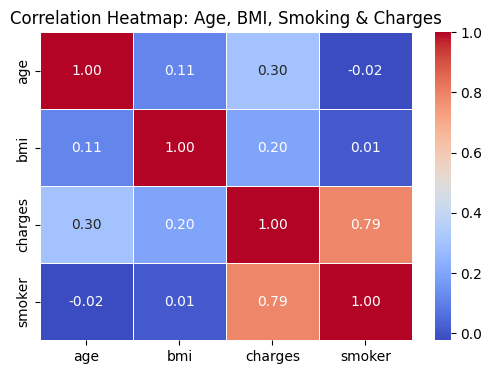

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert smoker to numeric


# Compute correlation matrix
corr_matrix = mi1[['age', 'bmi', 'charges', 'smoker']].corr()

# Plot correlation heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap: Age, BMI, Smoking & Charges')
plt.show()





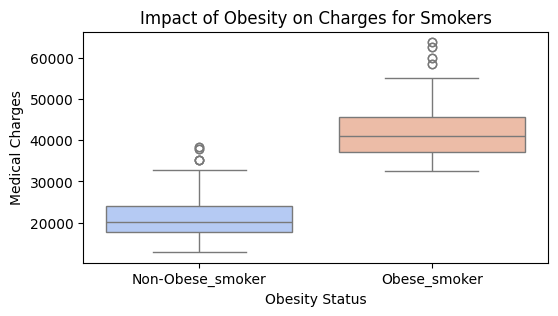

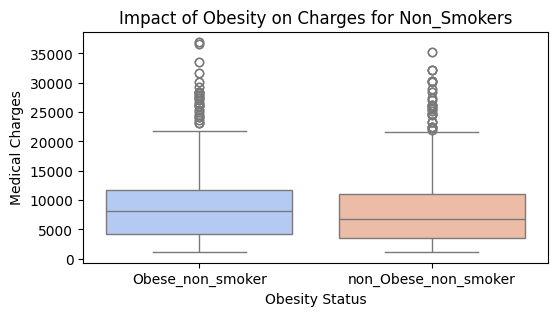

In [6]:

smokers_mi1 = mi1[mi1['smoker'] == 'yes']
smokers_mi1['Obesity_Status'] = smokers_mi1['bmi'].apply(lambda x: 'Obese_smoker' if x > 30 else 'Non-Obese_smoker')

plt.figure(figsize=(6, 3))
sns.boxplot(x=smokers_mi1['Obesity_Status'], y=smokers_mi1['charges'], palette='coolwarm')
plt.xlabel('Obesity Status')
plt.ylabel('Medical Charges')
plt.title('Impact of Obesity on Charges for Smokers')
plt.show()


non_smokers_mi1 = mi1[mi1['smoker'] == 'no']
non_smokers_mi1['Non_Obesity_Status'] = non_smokers_mi1['bmi'].apply(lambda x: 'non_Obese_non_smoker' if x <= 30 else 'Obese_non_smoker')

plt.figure(figsize=(6, 3))
sns.boxplot(x=non_smokers_mi1['Non_Obesity_Status'], y=non_smokers_mi1['charges'], palette='coolwarm')
plt.xlabel('Obesity Status')
plt.ylabel('Medical Charges')
plt.title('Impact of Obesity on Charges for Non_Smokers')
plt.show()


In [74]:
mi1.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [ ]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaler.fit(X_train)

# X_train = scaler.transform(X_train)
# X_val = scaler.transform(X_val)
# X_test = scaler.transform(X_test)

In [25]:

mi1["sex"] = mi1["sex"].map({"male": 1, "female": 0})
mi1["sex"] = mi1["sex"].astype(int)
mi1["smoker"] = mi1["smoker"].map({"yes": 1, "no": 0})
mi1["smoker"] = mi1["smoker"].astype(int)

In [26]:
from sklearn.preprocessing import LabelEncoder

df = pd.DataFrame({'region': ['region_northeast', 'region_northwest', 'region_southeast', 'region_southwest']})
encoder = LabelEncoder()
mi1['region'] = encoder.fit_transform(mi1['region'])

print(mi1)



      age  sex     bmi  children  smoker  region      charges
0      19    0  27.900         0       1       3  16884.92400
1      18    1  33.770         1       0       2   1725.55230
2      28    1  33.000         3       0       2   4449.46200
3      33    1  22.705         0       0       1  21984.47061
4      32    1  28.880         0       0       1   3866.85520
...   ...  ...     ...       ...     ...     ...          ...
2767   47    0  45.320         1       0       2   8569.86180
2768   21    0  34.600         0       0       3   2020.17700
2769   19    1  26.030         1       1       1  16450.89470
2770   23    1  18.715         0       0       1  21595.38229
2771   54    1  31.600         0       0       3   9850.43200

[2772 rows x 7 columns]


Spearman Correlation Matrix:
               age       sex       bmi  children    smoker    region   charges
age       1.000000 -0.019748  0.107897  0.055813 -0.025798  0.003764  0.533523
sex      -0.019748  1.000000  0.044777  0.016372  0.076596  0.004973  0.010748
bmi       0.107897  0.044777  1.000000  0.015643  0.002216  0.152960  0.119585
children  0.055813  0.016372  0.015643  1.000000  0.016199  0.010228  0.132200
smoker   -0.025798  0.076596  0.002216  0.016199  1.000000 -0.002361  0.663611
region    0.003764  0.004973  0.152960  0.010228 -0.002361  1.000000 -0.044142
charges   0.533523  0.010748  0.119585  0.132200  0.663611 -0.044142  1.000000


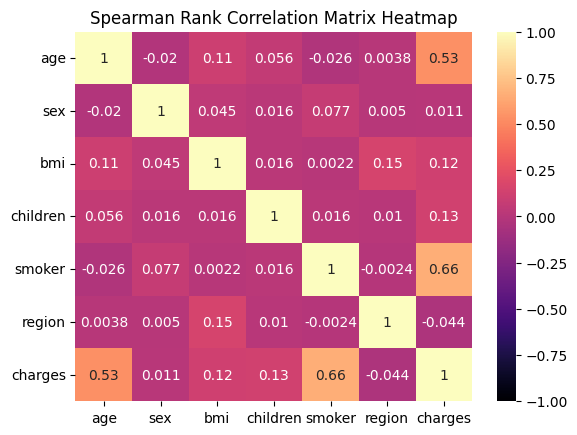

In [21]:
spearman_corr = mi1.corr(method='spearman')

print("Spearman Correlation Matrix:")
print(spearman_corr)
# Heatmap for visualization
sns.heatmap(spearman_corr, annot=True, cmap='magma', vmin=-1, vmax=1)
plt.title('Spearman Rank Correlation Matrix Heatmap')
plt.show()


Spearman Rank Correlation Matrix:
                age       sex       bmi  children    smoker    region
age       1.000000 -0.019748  0.107897  0.055813 -0.025798  0.003764
sex      -0.019748  1.000000  0.044777  0.016372  0.076596  0.004973
bmi       0.107897  0.044777  1.000000  0.015643  0.002216  0.152960
children  0.055813  0.016372  0.015643  1.000000  0.016199  0.010228
smoker   -0.025798  0.076596  0.002216  0.016199  1.000000 -0.002361
region    0.003764  0.004973  0.152960  0.010228 -0.002361  1.000000


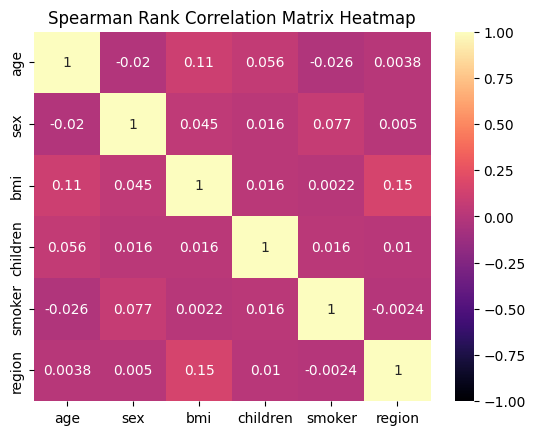

In [20]:
spearman_corr_matrix = mi1.drop('charges', axis=1).corr(method='spearman')

# Display the correlation matrix
print("Spearman Rank Correlation Matrix:\n", spearman_corr_matrix)

# Heatmap for visualization
sns.heatmap(spearman_corr_matrix, annot=True, cmap='magma', vmin=-1, vmax=1)
plt.title('Spearman Rank Correlation Matrix Heatmap')
plt.show()

In [8]:
print(mi1.columns)


Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


In [17]:
mi1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   int64  
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   int64  
 5   region    2772 non-null   int64  
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 151.7 KB


In [28]:
mi1 = mi1.drop_duplicates(subset=["age", "sex","bmi","children","smoker", 'region', 'charges'], keep="first")

In [19]:
mi1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   int64  
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   int64  
 5   region    1337 non-null   int64  
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 83.6 KB


In [29]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Apply StandardScaler only to the 'Age' column
mi1['charges'] = scaler.fit_transform(mi1[['charges']])

print(mi1)



      age  sex     bmi  children  smoker  region   charges
0      19    0  27.900         0       1       3  0.297857
1      18    1  33.770         1       0       2 -0.954381
2      28    1  33.000         3       0       2 -0.729373
3      33    1  22.705         0       0       1  0.719104
4      32    1  28.880         0       0       1 -0.777499
...   ...  ...     ...       ...     ...     ...       ...
1333   50    1  30.970         3       0       1 -0.221263
1334   18    0  31.920         0       0       0 -0.914695
1335   18    0  36.850         0       0       2 -0.962287
1336   21    0  25.800         0       0       3 -0.931054
1337   61    0  29.070         0       1       1  1.310298

[1337 rows x 7 columns]


In [12]:
mi1.head(15)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,0.298245
1,18,1,33.770,1,0,2,-0.949483
2,28,1,33.000,3,0,2,-0.725285
3,33,1,22.705,0,0,1,0.717976
4,32,1,28.880,0,0,1,-0.773238
5,31,0,25.740,0,0,2,-0.782311
6,46,0,33.440,1,0,2,-0.413247
7,37,0,27.740,3,0,1,-0.492187
8,37,1,29.830,2,0,0,-0.564214
9,60,0,25.840,0,0,1,1.289079


Spearman Correlation Matrix:
               age       sex       bmi  children    smoker    region   charges
age       1.000000 -0.026209  0.112580  0.052196 -0.023247  0.003156  0.535880
sex      -0.026209  1.000000  0.041116  0.013687  0.082326  0.004882  0.010094
bmi       0.112580  0.041116  1.000000  0.003633  0.010842  0.154293  0.121857
children  0.052196  0.013687  0.003633  1.000000  0.017663  0.007350  0.131624
smoker   -0.023247  0.082326  0.010842  0.017663  1.000000 -0.006988  0.662331
region    0.003156  0.004882  0.154293  0.007350 -0.006988  1.000000 -0.051935
charges   0.535880  0.010094  0.121857  0.131624  0.662331 -0.051935  1.000000


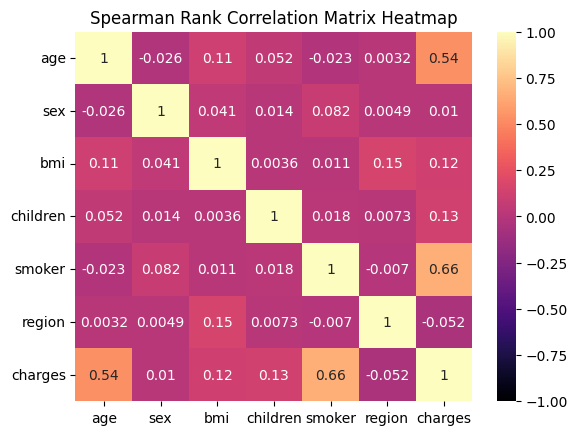

In [11]:
spearman_corr = mi1.corr(method='spearman')

print("Spearman Correlation Matrix:")
print(spearman_corr)
# Heatmap for visualization
sns.heatmap(spearman_corr, annot=True, cmap='magma', vmin=-1, vmax=1)
plt.title('Spearman Rank Correlation Matrix Heatmap')
plt.show()

In [30]:

y = mi1["charges"]
X = mi1.drop(columns="charges")

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 1)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1069, 6), (1069,), (268, 6), (268,))

In [81]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [10,45,90, 50, 100, 200],
    'max_depth': [None,3,6,8,9, 10,15, 20, 30,40,50,60]
}

# Initialize model
rf = RandomForestRegressor()

# Perform grid search
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)



Best Parameters: {'max_depth': 3, 'n_estimators': 100}


In [ ]:
# from sklearn.preprocessing import StandardScaler

# # Initialize scalers for features (X) and target (y)
# scaler_X = StandardScaler()
# scaler_y = StandardScaler()

# # Fit & transform X_train and y_train
# X_train_scaled = scaler_X.fit_transform(X_train)
# y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))

# # Transform X_test and y_test using the fitted scalers
# X_test_scaled = scaler_X.transform(X_test)
# y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))

In [31]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from xgboost import XGBRegressor

# Initialize Model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=2,Randomstate=42)

# Train Model
xgb_model.fit(X_train, y_train)

# Make Predictions
y_train_pred = xgb_model.predict(X_train)  # Missing in your code
y_test_pred = xgb_model.predict(X_test)

# Evaluate Model Performance
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Print Results
print(f"Train R² Score: {r2_train}, Test R² Score: {r2_test}")
print(f"Train MAE: {mae_train}, Test MAE: {mae_test}")
print(f"Train MSE: {mse_train}, Test MSE: {mse_test}")

Train R² Score: 0.8796927104563808, Test R² Score: 0.8639325158212012
Train MAE: 0.19698276208361806, Test MAE: 0.1907654965766273
Train MSE: 0.12333707816016676, Test MSE: 0.12010598111265568


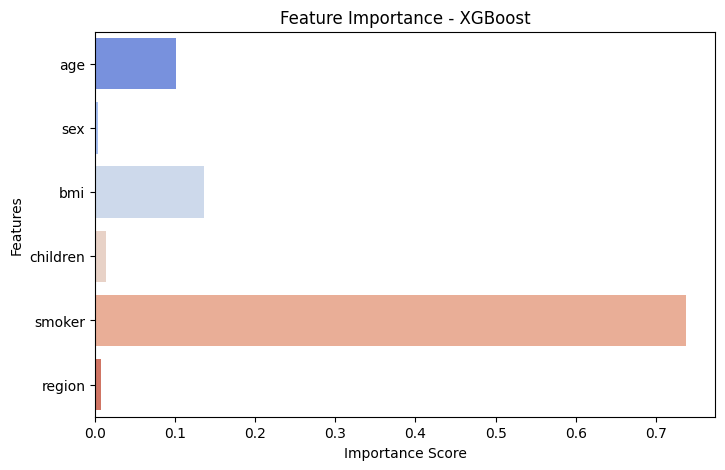

In [32]:
feature_importances = xgb_model.feature_importances_

# Create a bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x=feature_importances, y=X_train.columns, palette='coolwarm')
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance - XGBoost")
plt.show()



In [103]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


# Initialize and train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)

# Evaluate model performance
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Print results
print(f"Train R² Score: {r2_train}, Test R² Score: {r2_test}")
print(f"Train MAE: {mae_train}, Test MAE: {mae_test}")
print(f"Train MSE: {mse_train}, Test MSE: {mse_test}")

Train R² Score: 0.7480067922031551, Test R² Score: 0.7526116094775539
Train MAE: 0.3605760633141973, Test MAE: 0.3223180031002141
Train MSE: 0.2583393415625246, Test MSE: 0.21836830113309963


In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define model
rf = RandomForestRegressor()

# Define parameter grid
param_grid = {
    'n_estimators': [10, 30, 50, 100,200],
    'max_depth': [5, 10, 15, 20,30,50],
    'min_samples_split': [2,3, 5, 10,20,30],
    'min_samples_leaf': [1, 2, 4,6,10,20,30]
}

# Grid Search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train_scaled)

# Best params
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 50, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [39]:
# Train model with best parameters
rf = RandomForestRegressor(max_depth= 3,min_samples_leaf= 1, min_samples_split= 2,  n_estimators= 100, random_state=42)
rf.fit(X_train, y_train)

# Predictions
# y_pred = rf_best.predict(X_test)
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)
# Evaluation Metrics
r2 = r2_score(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)

# Evaluate model performance
r2_trainRF = r2_score(y_train, y_train_pred)
r2_testRF = r2_score(y_test, y_test_pred)
mae_trainRF = mean_absolute_error(y_train, y_train_pred)
mae_testRF = mean_absolute_error(y_test, y_test_pred)
mse_trainRF = mean_squared_error(y_train, y_train_pred)
mse_testRF = mean_squared_error(y_test, y_test_pred)

# Print results
print(f"Train R² Score: {r2_trainRF}, Test R² Score: {r2_testRF}")
print(f"Train MAE: {mae_trainRF}, Test MAE: {mae_testRF}")
print(f"Train MSE: {mse_trainRF}, Test MSE: {mse_testRF}")

print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")



Train R² Score: 0.8617032073459868, Test R² Score: 0.8698160011729326
Train MAE: 0.2210425785561252, Test MAE: 0.2014046978319408
Train MSE: 0.14177962440658326, Test MSE: 0.11491266262957807
R² Score: 0.8698
Mean Squared Error: 0.1149


[0.10623136 0.         0.17628482 0.00418883 0.71329499 0.        ]


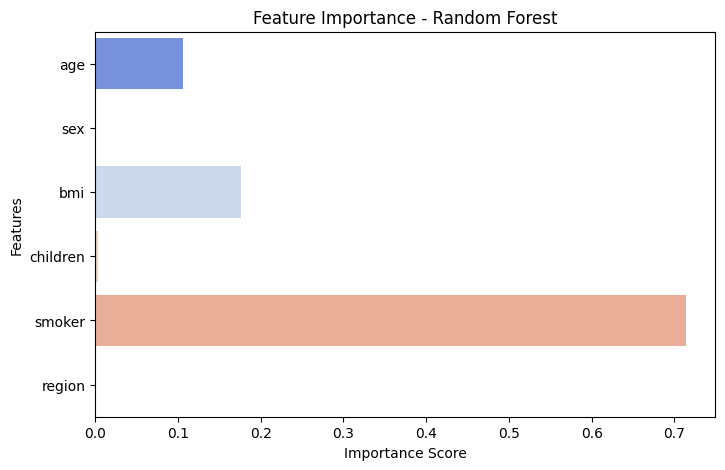

In [38]:

feature_importances = rf.feature_importances_
print(feature_importances)
# Create a bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x=feature_importances, y=X_train.columns, palette='coolwarm')
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance - Random Forest")
plt.show()



In [90]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100,50,0.01,200],
    'epsilon': [0.01, 0.1, 0.5, 1, 2, 5,10,50,100]
}

# Create SVR model
svr = SVR(kernel='rbf')

# Grid Search with cross-validation
grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters:", grid_search.best_params_)

Best parameters: {'C': 200, 'epsilon': 0.1}


In [91]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Define SVR model
svr_model = SVR(kernel='rbf', C=200, epsilon=.1)
svr_model.fit(X_train, y_train)

# Predictions
y_train_pred = svr_model.predict(X_train)
y_test_pred = svr_model.predict(X_test)

# Evaluate model performance
r2_trainSVR = r2_score(y_train, y_train_pred)
r2_testSVR = r2_score(y_test, y_test_pred)
mae_trainSVR = mean_absolute_error(y_train, y_train_pred)
mae_testSVR = mean_absolute_error(y_test, y_test_pred)
mse_trainSVR = mean_squared_error(y_train, y_train_pred)
mse_testSVR = mean_squared_error(y_test, y_test_pred)

# Print results
print(f"Train R² Score: {r2_trainSVR}, Test R² Score: {r2_testSVR}")
print(f"Train MAE: {mae_trainSVR}, Test MAE: {mae_testSVR}")
print(f"Train MSE: {mse_trainSVR}, Test MSE: {mse_testSVR}")

Train R² Score: 0.8369177812285993, Test R² Score: 0.8435725991115216
Train MAE: 0.21106331539440454, Test MAE: 0.1675970618140929
Train MSE: 0.1671892404811347, Test MSE: 0.13807756180694356


In [96]:
pip install lightgbm


Note: you may need to restart the kernel to use updated packages.


In [ ]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'num_leaves': [30, 50, 80],
    'max_depth': [5, 10, 15],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 300, 500],
    'min_data_in_leaf': [10, 20, 30],
    'feature_fraction': [0.7, 0.8, 0.9],
    'lambda_l1': [0.1, 1, 5, 10],
    'lambda_l2': [0.1, 1, 5, 10]
}


# Create LightGBM model
lgb_model = lgb.LGBMRegressor()

# Grid Search with cross-validation
grid_search = GridSearchCV(lgb_model, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters
best_params = grid_search.best_params_
print("Best parameters:", best_params)

In [114]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Train LightGBM with best parameters
lgb_best = lgb.LGBMRegressor(num_leaves=10,max_depth=3,learning_rate=.01,n_estimators=500)
lgb_best.fit(X_train, y_train)

# Predictions
y_train_pred = lgb_best.predict(X_train)
y_test_pred = lgb_best.predict(X_test)

# Evaluate model performance
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Print results
print(f"Train R² Score: {r2_train}, Test R² Score: {r2_test}")
print(f"Train MAE: {mae_train}, Test MAE: {mae_test}")
print(f"Train MSE: {mse_train}, Test MSE: {mse_test}")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000217 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 316
[LightGBM] [Info] Number of data points in the train set: 1069, number of used features: 6
[LightGBM] [Info] Start training from score -0.020562
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

In [ ]:
import optuna
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Define objective function for tuning alpha
def objective(trial):
    alpha = trial.suggest_float('alpha', 0.0001, 100, log=True)  # Log-scale for better range
    
    model = Ridge(alpha=alpha)
    score = cross_val_score(model, X_train, y_train_scaled, cv=5, scoring='r2').mean()
    
    return score  # Maximizing R^2 score

# Run optimization
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# Best alpha
print("Best Alpha:", study.best_trial.params['alpha'])

In [ ]:
import numpy as np
from sklearn.linear_model import RidgeCV

# Define alpha values
alphas = np.logspace(-3, 3, 100)  # Range from 0.001 to 1000

# Perform Cross-Validation
ridge_cv = RidgeCV(alphas=alphas, scoring='r2', cv=5)
ridge_cv.fit(X_train, y_train)

# Best alpha
print("Best Alpha:", ridge_cv.alpha_)

In [76]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
# Train Ridge Regression with optimized alpha
ridge_best = Ridge(alpha=0.1)
ridge_best.fit(X_train, y_train)

# Make Predictions
# y_pred = ridge_best.predict(X_test)
y_train_pred = ridge_best.predict(X_train)
y_test_pred = ridge_best.predict(X_test)
# Evaluate model performance
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Print results
print(f"Train R² Score: {r2_train}, Test R² Score: {r2_test}")
print(f"Train MAE: {mae_train}, Test MAE: {mae_test}")
print(f"Train MSE: {mse_train}, Test MSE: {mse_test}")

Train R² Score: 0.7480066029055172, Test R² Score: 0.7525695788684394
Train MAE: 0.36064513165143336, Test MAE: 0.3224077120750802
Train MSE: 0.25833953562738665, Test MSE: 0.21840540130861125


In [75]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, mean_squared_error

# Train Lasso Regression with optimized alpha
Lasso_best = Lasso(alpha=.001)
Lasso_best.fit(X_train, y_train)  # Make sure X_train is scaled if needed

# Make Predictions
# y_pred = Lasso_best.predict(X_test)  # Ensure X_test is scaled similarly
y_train_pred = Lasso_best.predict(X_train)
y_test_pred = Lasso_best.predict(X_test)
# Evaluate model performance
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Print results
print(f"Train R² Score: {r2_train}, Test R² Score: {r2_test}")
print(f"Train MAE: {mae_train}, Test MAE: {mae_test}")
print(f"Train MSE: {mse_train}, Test MSE: {mse_test}")

Train R² Score: 0.7479946844795144, Test R² Score: 0.7528839209726084
Train MAE: 0.3608196365284804, Test MAE: 0.32238025044890034
Train MSE: 0.2583517542040419, Test MSE: 0.21812793335178018


In [77]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Initialize Decision Tree
dt = DecisionTreeRegressor()

# Define parameter grid
param_grid = {'max_depth': range(1, 121)}

# Grid Search
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best max_depth
best_depth = grid_search.best_params_['max_depth']
print("Best Max Depth:", best_depth)

Best Max Depth: 4


In [78]:
# Train model with best depth
dt_best = DecisionTreeRegressor(max_depth=4, random_state=42)
dt_best.fit(X_train, y_train)

# Predict
# y_pred = dt_best.predict(X_test)
y_train_pred = dt_best.predict(X_train)
y_test_pred = dt_best.predict(X_test)
# Evaluate model performance
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Print results
print(f"Train R² Score: {r2_train}, Test R² Score: {r2_test}")
print(f"Train MAE: {mae_train}, Test MAE: {mae_test}")
print(f"Train MSE: {mse_train}, Test MSE: {mse_test}")

Train R² Score: 0.8669273259010203, Test R² Score: 0.8502186179441662
Train MAE: 0.22461219033709928, Test MAE: 0.2210122279900976
Train MSE: 0.1364239429596454, Test MSE: 0.13221115943164094


In [81]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

# Define model
elastic_net = ElasticNet(max_iter=10000)

# Define parameter grid
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9, 1.0]
}

# Grid Search
grid_search = GridSearchCV(elastic_net, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train_scaled)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'alpha': 0.001, 'l1_ratio': 1.0}


In [15]:
# Fit model with optimized hyperparameters
elasto_model = ElasticNet(alpha=0.001, l1_ratio=1,random_state=42)
elasto_model.fit(X_train, y_train)

# Predict on test set
y_train_pred = elasto_model.predict(X_train)
y_test_pred = elasto_model.predict(X_test)

# Evaluate model performance
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Print results
print(f"Train R² Score: {r2_train}, Test R² Score: {r2_test}")
print(f"Train MAE: {mae_train}, Test MAE: {mae_test}")
print(f"Train MSE: {mse_train}, Test MSE: {mse_test}")

Train R² Score: 0.7479946844795144, Test R² Score: 0.7528839209726084
Train MAE: 0.3608196365284804, Test MAE: 0.32238025044890034
Train MSE: 0.2583517542040419, Test MSE: 0.21812793335178018


In [48]:
import mlflow
import mlflow.sklearn
import mlflow.xgboost
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

import webbrowser

# mlflow.set_tracking_uri("http://localhost:5000")
# mlflow.set_experiment("Insurance Cost Prediction2")

# Open MLflow UI automatically
webbrowser.open("http://localhost:5000")

True

In [49]:
lgb_best = lgb.LGBMRegressor(num_leaves=10,max_depth=3,learning_rate=.01,n_estimators=500)
lgb_best.fit(X_train, y_train)

svr_model = SVR(kernel='rbf', C=200, epsilon=.1)
svr_model.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011583 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 317
[LightGBM] [Info] Number of data points in the train set: 1069, number of used features: 6
[LightGBM] [Info] Start training from score 0.029101
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

SVR(C=200)

In [ ]:
import mlflow
import mlflow.sklearn
import mlflow.xgboost
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
import lightgbm as lgb

import webbrowser
# Define the models
models = {
    "LinearRegression(SS)": LinearRegression(),
    "XGBoost(SS)": XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=2,Randomstate=42),
    "RandomForest(SS)": RandomForestRegressor(max_depth= 3,min_samples_leaf= 1, min_samples_split= 2,  n_estimators= 100, random_state=42),
    "Ridge(SS)": Ridge(alpha=0.1),
    "Lasso(SS)": Lasso(alpha=.001),
    "lgb_best(SS)" : lgb.LGBMRegressor(num_leaves=10,max_depth=3,learning_rate=.01,n_estimators=500),
    "svr_model(SS)": SVR(kernel='rbf', C=200, epsilon=.1),
    "DecisionTree(SS)":  DecisionTreeRegressor(max_depth=4, random_state=42),
    "ElasticNet(SS)": ElasticNet(alpha=0.001, l1_ratio=1.0,random_state=42)  # l1_ratio balances Ridge & Lasso effects




}

mlflow.set_tracking_uri("https://dagshub.com/shanmugasundaram1996/medical_insurence_cost_prediction")
mlflow.set_experiment("Insurance Cost Prediction2")

# Train and log each model in MLflow
for model_name, model in models.items():
    with mlflow.start_run(run_name=model_name):
        # Train the model
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Calculate metrics
        r2 = r2_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)

        # Log model type
        mlflow.set_tag("model_name", model_name)

        # Log metrics
        mlflow.log_metric("R² Score", r2)
        mlflow.log_metric("MAE", mae)
        mlflow.log_metric("MSE", mse)

        # Log the model using the correct MLflow function
        if model_name == "XGBoost(SS)":
            mlflow.xgboost.log_model(model, artifact_path=f"{model_name}_ Insurance Cost Predictor Model")
        elif model_name == "LinearRegression(SS)":
            mlflow.sklearn.log_model(model, artifact_path=f"{model_name}_Insurance Cost Predictor Model")
        elif model_name == "RandomForest(SS)":
            mlflow.sklearn.log_model(model, artifact_path=f"{model_name}_Insurance Cost Predictor Model")
        elif model_name == "Ridge(SS)":
            mlflow.sklearn.log_model(model, artifact_path=f"{model_name}_Insurance Cost Predictor Model")
        elif model_name == "Lasso(SS)":
           mlflow.sklearn.log_model(model, artifact_path=f"{model_name}_Insurance Cost Predictor Model")
        elif model_name == "lgb_best(SS)":
           mlflow.lightgbm.log_model(model, artifact_path=f"{model_name}_Insurance Cost Predictor Model")
        elif model_name == "svr_model(SS)":
           mlflow.sklearn.log_model(model, artifact_path=f"{model_name}_Insurance Cost Predictor Model")   
        elif model_name == "DecisionTree(SS)":
            mlflow.sklearn.log_model(model, artifact_path=f"{model_name}_Insurance Cost Predictor Model")
        else:
            mlflow.sklearn.log_model(model, artifact_path=f"{model_name}_Insurance Cost Predictor Model")
        # elif model_name == "LinearRegression Insurance Cost Predictor":
        #     mlflow.sklearn.log_model(model, artifact_path=f"{model_name}_Insurance Cost Predictor Model")
        print(f"{model_name} logged successfully!")

print("All models are logged in MLflow!")

# Open MLflow UI automatically
webbrowser.open("https://dagshub.com/shanmugasundaram1996/medical_insurence_cost_prediction")

In [ ]:
from mlflow.tracking import MlflowClient

client = MlflowClient()
print(client.search_registered_models())

In [44]:
client.create_registered_model(name="RandomForest(SS)")

<RegisteredModel: aliases={}, creation_timestamp=1750413252896, description=None, last_updated_timestamp=1750413252896, latest_versions=[], name='RandomForest(SS)', tags={}>

In [13]:
mlflow.set_tracking_uri("http://localhost:5000")


In [ ]:
model_uri = "models:/RandomForest(SS)/1"
loaded_model = mlflow.pyfunc.load_model(model_uri)

In [18]:
from mlflow.tracking import MlflowClient

client = MlflowClient()
client.set_registered_model_alias(
    name="Random Forest Medical Insurence Cost Prediction",
    alias="Production",
    version=1


)

In [20]:
model_uri = "models:/Random Forest Medical Insurence Cost Prediction/1"


In [ ]:
input_data = (18,0,33.770,1,0,2)
input_data_as_numpy_array = np.asarray(input_data).reshape(1, -1)
y_pred_scaled = xgb_model.predict(input_data_as_numpy_array)
y_pred = scaler.inverse_transform(np.array(y_pred_scaled).reshape(1, -1))  # Adjust dimensions if needed
print(y_pred)


[[3442.407]]
